# 小作业二： 扩展式博弈与重复博弈

同学们在课上已经学习了扩展式博弈与重复博弈。在这次作业用，你们将会回顾之前的知识，并用python来加深对这些博弈的理解。

## 目录

本次作业主要分为以下几个部分：
- 扩展式博弈
    - 纳什均衡计算
    - 逆向归纳法
- 重复博弈
    - 环境搭建
    - 经典策略实现
    - 折现因子$\delta$的影响

## 提交说明：
请同学们在canvas上提交，本次作业满分100分，占总成绩15%。

**注意，请同学们在提交的版本中不要添加和删改notebook中的函数名，我们会根据这些实现的函数来进行评分。如有其他问题，请联系助教。**

提交文件名设置为 `{姓名}_{学号}_hw2.ipynb`，如`小明_123_hw2.ipynb`.


## 扩展式博弈


## 练习一（40分）


1. （20分）在一个简化的poker游戏中，有两名玩家Alice和Bob，牌堆由Ace和King两种类型的牌组成且比例相同，假设他们初始下注都为1。首先，Alice抓一张牌，然后决定是加注(+1)还是弃牌(Bob获胜并得到Alice下的注)。如果Alice决定加注，接下来Bob决定是加注(+1)还是弃牌(Alice获胜并得到Bob下的注)。如果Bob决定加注，那么Alice翻开她抓的牌，如果牌为Ace那么Alice获胜并得到Bob下的注，反之如果牌为King则Bob获胜并得到Alice下的注。请用上课讲过的知识计算出上述博弈的纳什均衡策略(P)及对应的收益(R)，并给出Alice选择加注时Bob认为Alice手牌为Ace的belief。 
![Alt text](1-1.png)

Notes：可以参考一下poker的游戏规则。如果Alice摸到King牌，她也不一定要弃牌，因为Bob不知道她是什么牌，只要Bob弃牌那么她依然可以获得胜利。只有当两方都选择加注时，输/赢才会是-2/+2。写策略的时候注意按照[p, 1-p]，p为加注概率来写。

请根据问题，把填写以下答案，$P_A$为Alice在纳什均衡点的策略(2 $\times$ 2的矩阵，第一行为Alice摸到Ace时的策略，第二行为Alice摸到King时的策略)，$R_A$为Alice在纳什均衡点的收益(一个数值)，$P_B$为Bob在纳什均衡点的策略(1 $\times$ 2的矩阵)，$R_B$为Bob在纳什均衡点的收益。belief为Alice选择加注时Bob认为Alice手牌为Ace的信念(一个概率值)

$P_A = [[1, 0], [\dfrac{1}{3}, \dfrac{2}{3}]], R_A = \dfrac{1}{3}$    

$P_B = [[\dfrac{2}{3}, \dfrac{1}{3}]], R_B = -\dfrac{1}{3}$    

$belief = \dfrac{3}{4}$  

2. （20分）完成以下代码，使用逆向归纳法求解子博弈精炼纳什均衡。

文件"data.txt"使用的是第四周课件第95页的博弈，格式解释如下：
- Node：通过';'进行拆分
    - Node id: 代表是第几号节点
    - T/F：是否为叶子节点
        - 如果是叶子节点(T)，那么后面跟的是两个玩家的收益，用()表示
        - 如果非叶子节点(F)，那么后面跟的是孩子节点的节点序号，用[]表示，最后是一个玩家id表示当前节点是该玩家做决策。

In [9]:
players = 0
tree = {}
with open("data.txt") as dataFile:
    players = int(dataFile.readline().split(":")[1].strip())
    dataFile.readline()
    text = dataFile.readline()
    while text != "":
        arr = text.split(';')
        if arr[1] == 'F':
            tree[arr[0]] = {'isLeaf': 'F', 'children': arr[2][1:-1].split(','), 'player': int(arr[3].replace("\n",""))}
        elif arr[1] == 'T':
            tree[arr[0]] = {'isLeaf': 'T', 'payoffs': arr[2].replace("\n","")[1:-1].split(',')}
        text = dataFile.readline()

def induction(node:str):
    ### TODO: write your code here ####
    ### set nash equilibrium path ###
    ### hint: set tree[node]['best'] attribute here
    if 'best' not in tree[node].keys():
        if tree[node]['isLeaf'] == 'T':
            tree[node]['best'] = [node, tree[node]['payoffs']]
        else:
            children = tree[node]['children']
            for child in children:
                induction(child)
            payoff_1 = tree[children[0]]['best'][1]
            payoff_2 = tree[children[1]]['best'][1]
            player = tree[node]['player']
            # 优先让自己收益大
            if int(payoff_1[player]) > int(payoff_2[player]):
                tree[node]['best'] = [children[0], payoff_1]
            elif int(payoff_1[player]) < int(payoff_2[player]):
                tree[node]['best'] = [children[1], payoff_2]
            else:
                # 相等时尽量让对手收益小
                another = 1 - player
                if int(payoff_1[another]) > int(payoff_2[another]):
                    tree[node]['best'] = [children[1], payoff_2]
                else:
                    tree[node]['best'] = [children[0], payoff_1]
    else:
        return

def bestStrategy():
    msj = f"{'Node':^10}{'Player':^10}{'Best Option':^10}\n"
    node = tree['0']
    current = 0
    while node['isLeaf'] == 'F':
        msj += f"{current:^10}{node['player']:^10}{node['best'][0]:^10}\n"
        current = node['best'][0]
        node = tree[node['best'][0]]
    msj += f"The payoff is {node['best'][1]} in the node {current}"
    return msj

induction('0')
print(bestStrategy())

   Node     Player  Best Option
    0         0         1     
    1         1         3     
    3         0         6     
The payoff is ['3', '2'] in the node 6


## 重复博弈

假设两名在进行重复囚徒困境博弈，每个阶段博弈中玩家的收益矩阵为
$$
\mathbf{R}^1 = \left[\begin{matrix}
2 & 0 \\
3 & 1
\end{matrix}\right] 
\quad 
\mathbf{R}^2 = \left[\begin{matrix}
2 & 3 \\
0 & 1
\end{matrix}\right].
$$
其中第0行/列的动作为抵赖，第1行/列的动作为招供。\
此重复博弈的每个阶段博弈只有一个纳什均衡点(招供，招供)，在课上我们已经学到：阶段博弈重复有限次，在博弈的每个阶段中，博弈的结果都是阶段博弈的纳什均衡，但在无限重复博弈中情况是不同的。

### 练习三 （60分）
1. （15分）请填充以下代码，搭建重复囚徒困境博弈环境


In [11]:
import numpy as np
class iterated_games():
  def __init__(self, payoff1, payoff2, max_step):
    self.payoff1 = payoff1
    self.payoff2 = payoff2
    self.max_step_num = max_step
    self.reset()

  def reset(self):
    self.history = {'agent1':[], 'agent2':[]}
    self.step_num = 0
    return self.history
  
  def step(self, a1, a2):
    ### We recommend that the history can be a dictionary, where each element is a list
    ### like self.history['agent1'] = [a11, a12, ...], self.history['agent2']=[a21, a22, ...] defined in the above function
    ### So you can directly return self.history

    ### input: a1 refers to action for agent 1, a2 refers to action for agent 2
    ### TODO: Implement the step function ###
    self.history['agent1'].append(a1)
    self.history['agent2'].append(a2)
    self.step_num += 1
    # check if the game is over
    done = True if self.step_num >= self.max_step_num else False
    r1 = self.payoff1[a1][a2]
    r2 = self.payoff2[a1][a2]

    ### END TODO ###

    return r1, r2, self.history, done
    # return
    # r1: agent1's reward
    # r2: agent2's reward
    # history: dictionary contains historical information
    # done: if step_num reaches max step number, done=True, else done=False

### Run some simulations to verify the correctness of your algorithm
p1 = np.random.randn(2,2) # two random payoff matrix
p2 = np.random.randn(2,2)
env = iterated_games(p1, p2, 10)
done = False
print(p1)
print(p2)
while True:
  if done:
    break
  a1 = np.random.choice(2)
  a2 = np.random.choice(2)
  r1, r2, history, done = env.step(a1, a2)
  print(a1, a2, r1, r2,history,done)

[[ 1.17430898  2.38065518]
 [-0.26295345 -0.7114574 ]]
[[-0.56408401 -0.45133502]
 [ 0.40075805  0.82278681]]
0 0 1.174308981945629 -0.5640840121500581 {'agent1': [0], 'agent2': [0]} False
1 0 -0.2629534464969761 0.4007580517191415 {'agent1': [0, 1], 'agent2': [0, 0]} False
0 0 1.174308981945629 -0.5640840121500581 {'agent1': [0, 1, 0], 'agent2': [0, 0, 0]} False
0 0 1.174308981945629 -0.5640840121500581 {'agent1': [0, 1, 0, 0], 'agent2': [0, 0, 0, 0]} False
0 1 2.3806551781437078 -0.45133502144581905 {'agent1': [0, 1, 0, 0, 0], 'agent2': [0, 0, 0, 0, 1]} False
0 0 1.174308981945629 -0.5640840121500581 {'agent1': [0, 1, 0, 0, 0, 0], 'agent2': [0, 0, 0, 0, 1, 0]} False
1 0 -0.2629534464969761 0.4007580517191415 {'agent1': [0, 1, 0, 0, 0, 0, 1], 'agent2': [0, 0, 0, 0, 1, 0, 0]} False
1 1 -0.7114574018964813 0.8227868083243338 {'agent1': [0, 1, 0, 0, 0, 0, 1, 1], 'agent2': [0, 0, 0, 0, 1, 0, 0, 1]} False
1 0 -0.2629534464969761 0.4007580517191415 {'agent1': [0, 1, 0, 0, 0, 0, 1, 1, 1], 'a

2. （20分）参考随机策略(random_agent)的写法，在搭建的博弈环境中实现以下三种策略：
- 触发策略(grim_trigger_agent): 选择抵赖，但如果对手选择招供，那么接下来每次阶段博弈都选择招供。
- 有限惩罚策略(limited_punish_agent)：与触发策略类似，选择抵赖，如果对手选择招供，那么接下来K次博弈都会选择招供(K+1次博弈时会选择抵赖)
- 一报还一报策略(tit_for_tat_agent)：总以合作开局，但从此以后就采取以其人之道还治其人之身的策略。

In [13]:
### We define the idx for identifying agent because the step function gets the history for both agents
### Or you can implement agent in your own ways
### Note that you need to handle corner case when the length of history is 0

### All agent get input of history dictionary, output the action

class random_agent:
  def __init__(self, idx=0):
    self.idx = idx ### idx for identifying which agent
  def step(self, history_both):
    action = np.random.choice(2)  
    return action

class grim_trigger_agent:
  def __init__(self, idx=0):
    self.idx = idx
  def step(self, history_both):
    ### TODO: Implement grim trigger agent ###
    # 首先判断对手是否招供过，如果招供过，那么就招供，否则就不招供
    if len(history_both['agent1']) == 0:
        action = 0
    else:
      # 判断自己是agent1还是agent2
      if self.idx == 0:
        name = 'agent1'
        opponent = 'agent2'
      else:
        name = 'agent2'
        opponent = 'agent1'
      if 1 in history_both[opponent]:
        action = 1
      else:
        action = 0
    ### END TODO ###
    return action

class limited_punish_agent:
  def __init__(self, k=3, idx=0):
    self.k = k # punishment step
    self.idx = idx
    ### TODO: Add the variables/functions if you need  ###
    self.punish_counter = 0
    self.punishing = False
    ### END TODO  ###
  def step(self, history_both):
    ### TODO: Implement limited punishment agent ###
    ### Note you may need to handle many corner cases:
    ### when the agent reverts back to cooperation: have to take cooperation no matter how the other player behaved
    ### when the agent is inside the k punishment step
    ### when the agent begin to punish
    opponent = 'agent2' if self.idx == 0 else 'agent1'
    if len(history_both[opponent]) == 0:
      action = 0
      return action
    # 根据self.punish_counter判断是否处于惩罚阶段
    if self.punish_counter > 0:# 处于惩罚阶段,则一直惩罚
      action = 1
      self.punish_counter -= 1
      self.punishing = True
    else:
      if self.punishing: # 处于惩罚阶段结束后的第一步，一定要选择合作
        action = 0
        self.punishing = False
      else: # 处于惩罚阶段结束后的第二步及以后，根据对手的行为选择合作或者不合作
        if history_both[opponent][-1] == 1:
          action = 1
          self.punish_counter = self.k
          self.punishing = True
        else:
          action = 0
    ### END TODO  ###
    return action

class tit_for_tat_agent:
  def __init__(self, idx=0):
    self.idx = idx
  def step(self, history_both):
    ### TODO: Implement tit for tat ###
    # 首先判断自己是agent1还是agent2
    opponent = 'agent2' if self.idx == 0 else 'agent1'
    if len(history_both[opponent]) == 0:
      action = 0
    else:
      action = history_both[opponent][-1]
    ### END TODO  ###
    return action



### Run some simulations to verify the correctness of your algorithm
### Random Agent
history = {'agent1': [1, 0, 0], 'agent2': [1, 0, 1]}
agent = random_agent(idx=0)
print('Test random agent')
for _ in range(5):
  print(agent.step(history))

### grim_trigger_agent for testing 2 cases
history = {'agent1': [1, 0, 0], 'agent2': [0, 0, 0]}
agent = grim_trigger_agent(idx=0)
print('Test grim_trigger_agent, case 1')
print('it should be', 0, agent.step(history))

history = {'agent1': [1, 0, 0], 'agent2': [0, 1, 0]}
print('Test grim_trigger_agent, case 2')
print('it should be', 1, agent.step(history))

### limited_punish_agent for testing
### You might define some flag variables in the implementation of limited_punish_agent
### So here it might be hard to directly test the correctness
### You might need to firstly implement the evaluation function in the next section 
### Then use that to verify the correctness


### tit_for_tat_agent for testing 2 cases
history = {'agent1': [1, 0, 0], 'agent2': [0, 1, 0]}
agent = tit_for_tat_agent(idx=0)
print('Test tit_for_tat_agent, case 1')
print('it should be', 0, agent.step(history))

history = {'agent1': [1, 0, 0], 'agent2': [0, 1, 1]}
print('Test tit_for_tat_agent, case 2')
print('it should be', 1, agent.step(history))


Test random agent
1
1
0
0
0
Test grim_trigger_agent, case 1
it should be 0 0
Test grim_trigger_agent, case 2
it should be 1 1
Test tit_for_tat_agent, case 1
it should be 0 0
Test tit_for_tat_agent, case 2
it should be 1 1


3. （25分）在不同的折现因子$\delta$情况下，各策略的表现可能不同。在对手采用一报还一报策略的情况下，完善以下代码，画出各策略的相对收益曲线图。

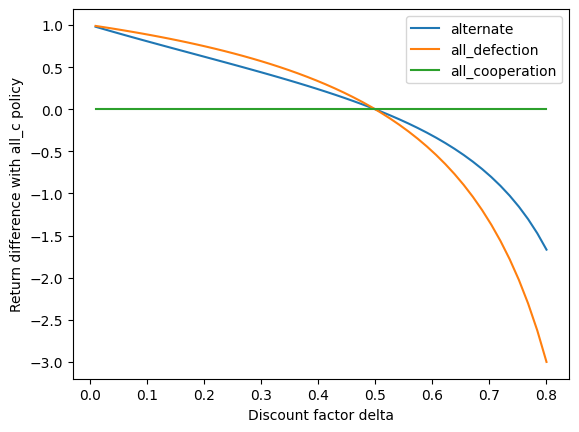

In [14]:
import numpy as np
def get_discount_return(return_list, delta):
  ### TODO: Implement discount return calculation ###
  return_all = 0
  for i in reversed(return_list):
    return_all = i + delta * return_all
  ### END TODO  ###
  return return_all

def evaluate(env, agent1, agent2, delta):
  history = env.reset()
  done = False
  r1_list = []
  r2_list = []
  while True:
    if done:
      break
    ### TODO: Implement rollouts ### 
    ### First take actions for both agent given the history
    ### Then take env rollout by env.step based on these two actions
    ### Finally, store the reward in r1_list, r2_list
    action_1, action_2 = agent1.step(history), agent2.step(history)
    r1, r2, history, done = env.step(action_1, action_2)
    r1_list.append(r1)
    r2_list.append(r2)
    ### END TODO  ###
  return1 = get_discount_return(r1_list, delta) # Discounted return for the first policy
  return2 = get_discount_return(r2_list, delta) # Discounted return for the second policy
  return return1, return2

payoff1 = np.array([[2,0],[3,1]])
payoff2 = np.array([[2,3],[0,1]])
max_step = 100
env = iterated_games(payoff1, payoff2, max_step)
delta_list = np.linspace(0.01, 0.8, 50)
reward_alternate = []
reward_all_d = []
reward_all_c = []

class alternate:
  def __init__(self, idx):
    self.idx = idx
    self.step_num = 0
  def step(self, history_both):
    if self.step_num % 2 == 0:
      action = 1
    else:
      action = 0
    self.step_num += 1
    return action

class all_c:
  def __init__(self, idx):
    self.idx = idx
  def step(self, history_both):
    action = 0
    return action

class all_d:
  def __init__(self, idx):
    self.idx = idx
  def step(self, history_both):
    action = 1
    return action

for delta in delta_list:
  ## TODO: Implement the agent ##
  ## Compare the performance between (tit_for_tat_agent, alternate), (tit_for_tat_agent, all_d), (tit_for_tat_agent, all_c)
  ## (tit_for_tat_agent, grim_trigger_agent), (tit_for_tat_agent, limited_punish_agent), (tit_for_tat_agent, tit_for_tat_agent)
  agent_tit_for_tat = tit_for_tat_agent(idx=0)
  agent_alternate = alternate(idx=1)
  agent_all_d = all_d(idx=1)
  agent_all_c = all_c(idx=1)

  r1, r2 = evaluate(env, agent_tit_for_tat, agent_alternate, delta)
  r1_1, r2_1 = evaluate(env, agent_tit_for_tat, agent_all_d, delta)
  r1_2, r2_2 = evaluate(env, agent_tit_for_tat, agent_all_c, delta)
  ## END TODO ###
  reward_alternate.append(r2)
  reward_all_d.append(r2_1)
  reward_all_c.append(r2_2)
  
reward_alternate = np.array(reward_alternate)
reward_all_d = np.array(reward_all_d)
reward_all_c = np.array(reward_all_c)


import matplotlib.pyplot as plt
plt.plot(delta_list, reward_alternate - reward_all_c, label='alternate')
plt.plot(delta_list, reward_all_d - reward_all_c, label='all_defection')
plt.plot(delta_list, reward_all_c - reward_all_c, label='all_cooperation')
plt.legend()
plt.xlabel('Discount factor delta')
plt.ylabel('Return difference with all_c policy')
plt.show()